<a href="https://colab.research.google.com/github/Ifeeding99/tensorflow-scripts/blob/main/mnist_classifier_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7


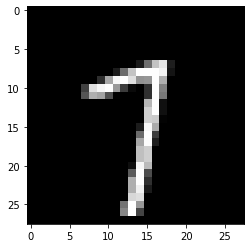

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets.mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
plt.imshow(X_train[42], cmap ='gray')
print(y_train[42])
plt.show()

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Rescaling, Dense

model = Sequential([
                    Rescaling(1/255),
                    SimpleRNN(units = 32, return_sequences = True, activation = 'tanh'), # to stack multiple layers of RNN it's useful to return the sequences
                    # the first layers has produced and feed them to the second layer,
                    # this is done by setting the return_sequences argument to True
                    SimpleRNN(units = 16, activation = 'tanh'),
                    Dense(units = 10, activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

training = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 32
)

Epoch 1/20
1500/1500 [==============================] - 21s 12ms/step - loss: 0.9403 - accuracy: 0.6868 - val_loss: 0.5753 - val_accuracy: 0.8206
Epoch 2/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.4976 - accuracy: 0.8470 - val_loss: 0.3983 - val_accuracy: 0.8793
Epoch 3/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3930 - accuracy: 0.8837 - val_loss: 0.3242 - val_accuracy: 0.9059
Epoch 4/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3410 - accuracy: 0.9005 - val_loss: 0.3093 - val_accuracy: 0.9092
Epoch 5/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.3077 - accuracy: 0.9114 - val_loss: 0.2581 - val_accuracy: 0.9239
Epoch 6/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2814 - accuracy: 0.9200 - val_loss: 0.2825 - val_accuracy: 0.9194
Epoch 7/20
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2644 - accuracy: 0.9248 - val_loss: 0.2523 -

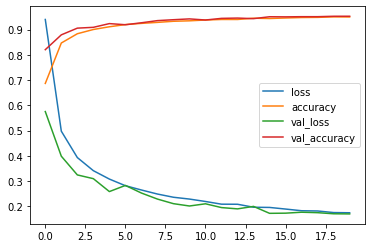

In [ ]:
import pandas as pd

history = pd.DataFrame(training.history)
history.plot()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1966 - accuracy: 0.9432


[0.19655685126781464, 0.9431999921798706]